Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics

Load Dataset

In [18]:
df = pd.read_csv("..\\Dataset\\House data.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [20]:
print("Initial shape:", df.shape)
df.head()

Initial shape: (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Data Preprocessing

In [21]:
df.drop('sqft_above', axis=1, inplace=True)
df.drop('sqft_basement', axis=1, inplace=True)

In [22]:
df.drop('date', axis=1, inplace=True)

In [23]:
columns = ["bedrooms","bathrooms","floors","view"]
for i in columns:
    df[i] = df[i].round()

In [24]:
df.nunique()

price           1741
bedrooms          10
bathrooms          9
sqft_living      566
sqft_lot        3113
floors             4
waterfront         2
view               5
condition          5
yr_built         115
yr_renovated      60
street          4525
city              44
statezip          77
country            1
dtype: int64

In [25]:
# dropping country cus it has only one country
df.drop('country', axis=1, inplace=True)
# dropping statezip, city and street due to too much categorical columns
df.drop('street', axis=1, inplace=True)
df.drop('city', axis=1, inplace=True)
df.drop('statezip', axis=1, inplace=True)

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,313000.0,3.0,2.0,1340,7912,2.0,0,0,3,1955,2005
1,2384000.0,5.0,2.0,3650,9050,2.0,0,4,5,1921,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1966,0
3,420000.0,3.0,2.0,2000,8030,1.0,0,0,4,1963,0
4,550000.0,4.0,2.0,1940,10500,1.0,0,0,4,1976,1992


In [27]:
# min year and max year in renovated
print(df['yr_renovated'].max())
print(df['yr_renovated'].min())

2014
0


In [28]:
# min year and max year in yr built
print(df['yr_built'].min())

1900


Scaling

In [ ]:
# only if the min of built year(1900) > len(year) and put 0 to other columns to reduce the errors

df['yr_renovated'] = np.where(
    df['yr_renovated'] > 1900,
    df['yr_renovated'] - df['yr_built'],
    0
)


In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,313000.0,3.0,2.0,1340,7912,2.0,0,0,3,1955,2005
1,2384000.0,5.0,2.0,3650,9050,2.0,0,4,5,1921,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1966,0
3,420000.0,3.0,2.0,2000,8030,1.0,0,0,4,1963,0
4,550000.0,4.0,2.0,1940,10500,1.0,0,0,4,1976,1992


In [30]:
# converting yr built into age
df.insert(0, "age", df["yr_built"].max()+1-df["yr_built"] )
df.drop('yr_built',axis=1,inplace=True)

In [31]:
df.head()

,age,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_renovated
0,60,313000.0,3.0,2.0,1340,7912,2.0,0,0,3,2005
1,94,2384000.0,5.0,2.0,3650,9050,2.0,0,4,5,0
2,49,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,0
3,52,420000.0,3.0,2.0,2000,8030,1.0,0,0,4,0
4,39,550000.0,4.0,2.0,1940,10500,1.0,0,0,4,1992


Null Value check

In [32]:
df.isnull().sum()

age             0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
yr_renovated    0
dtype: int64

OUtliers using IQR

In [33]:
# Before removing outliers
print("Original shape:", df.shape)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("After removing outliers:", df.shape)

Original shape: (4600, 11)
After removing outliers: (4360, 11)


Analyzing Dataset

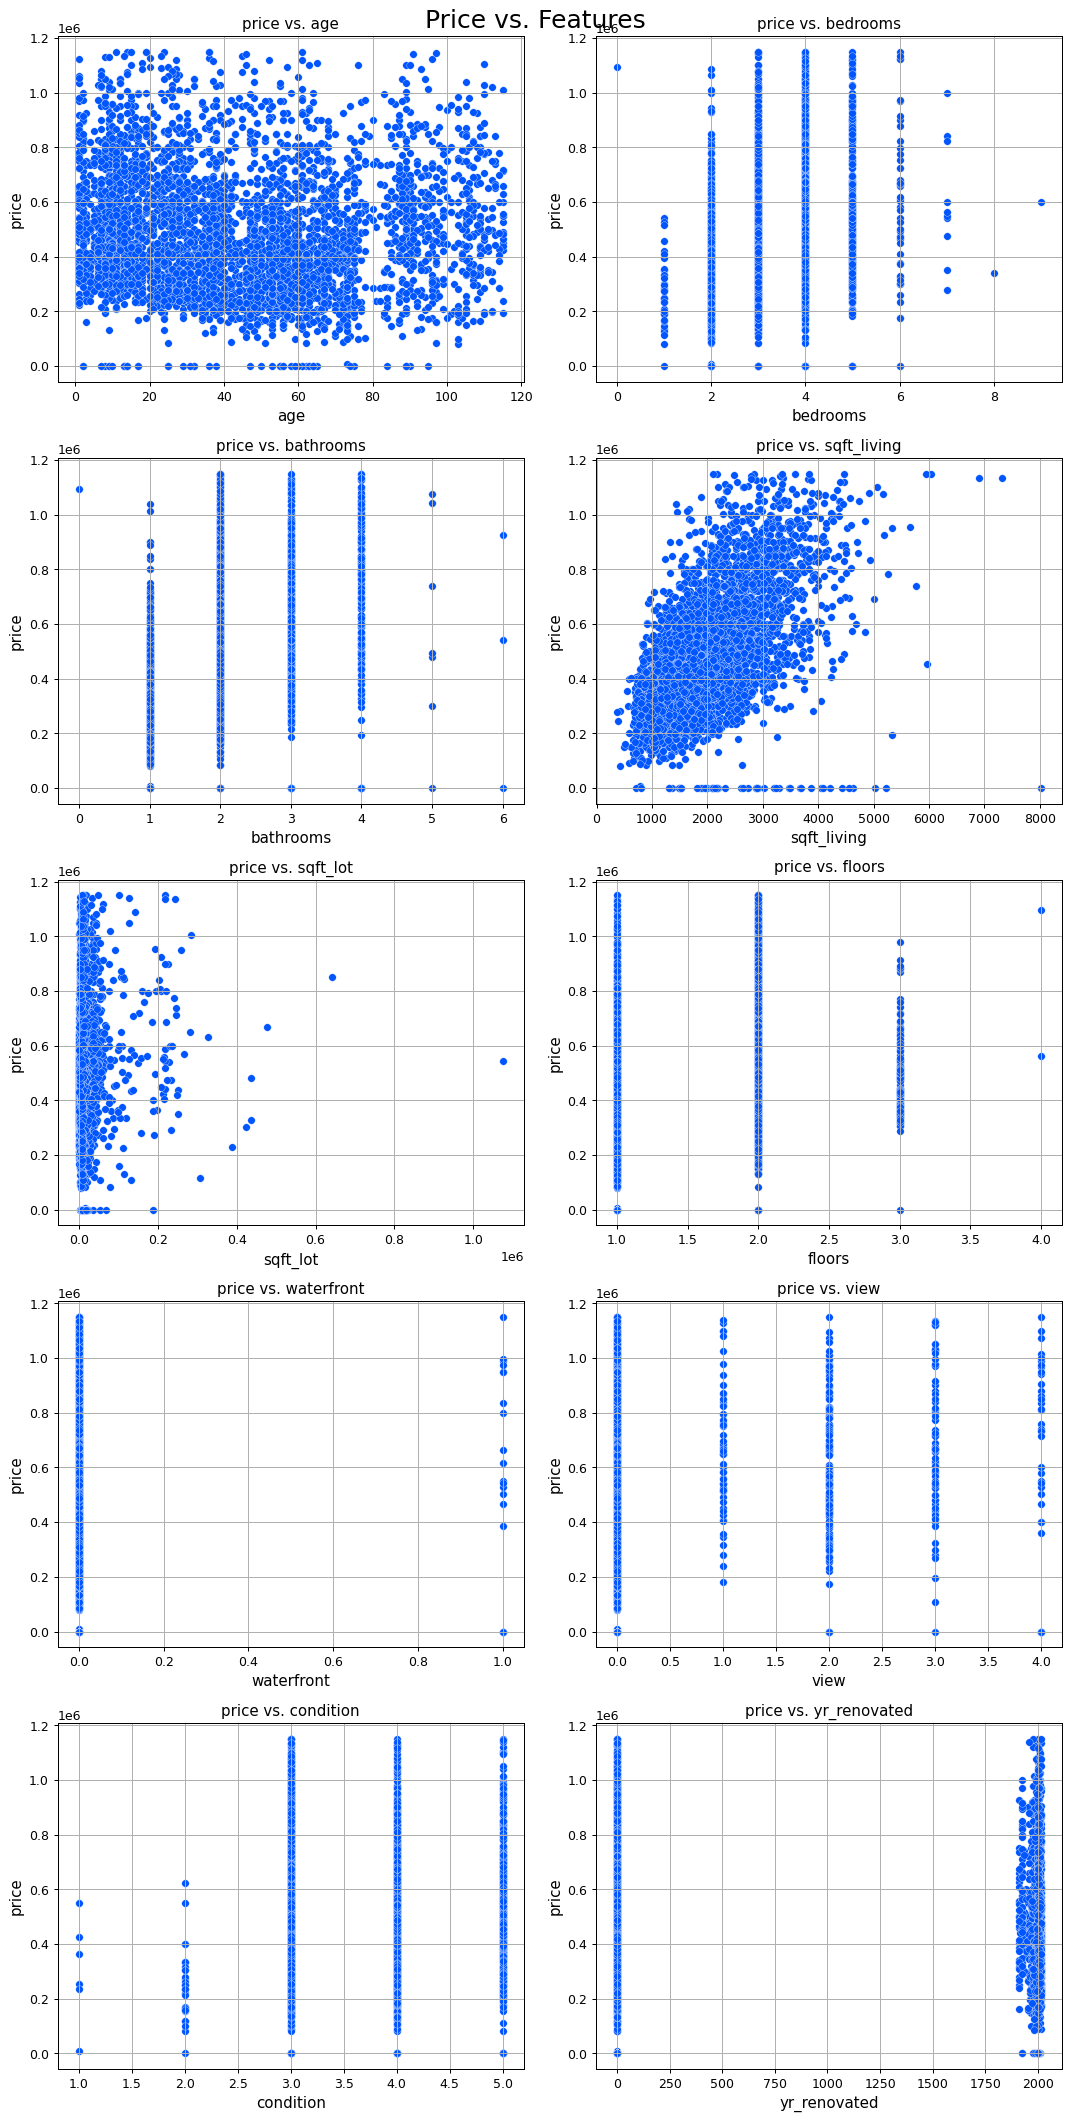

In [34]:
fig, ax = plt.subplots(nrows=5 ,ncols=2, figsize=(12,24), dpi=90)
features = ['age','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','yr_renovated']
target = 'price'
c = '#0055ff'

for i in range(len(features)):
    row = i//2
    col = i%2
    ax[row,col].scatter(df[features[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, features[i]), size = 12)
    ax[row,col].set_xlabel(features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('Price vs. Features', size = 20)
plt.tight_layout()
plt.show()

No categorical values so no encoding

In [35]:
df.drop('waterfront', axis=1, inplace=True)

Correlation Analysis

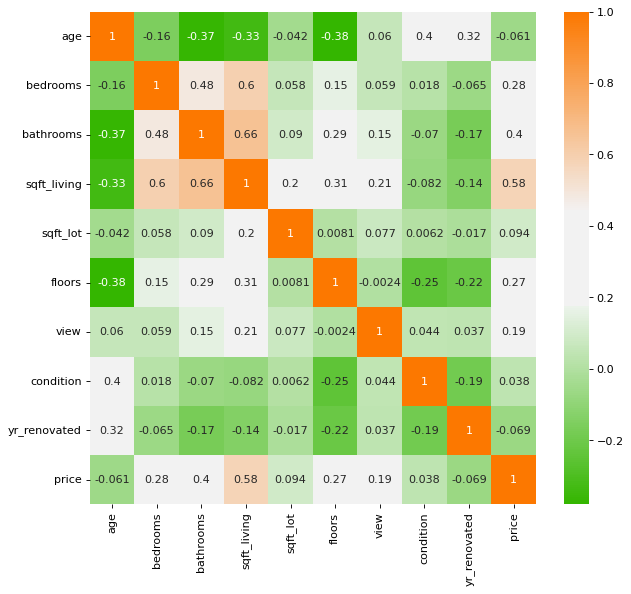

In [36]:
target = 'price'
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(pd.concat([df.drop(target,axis=1), df[target]],axis=1).corr(), annot=True, cmap=cmap)
plt.show()

Building the model

In [37]:
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train the model

In [42]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Show intercept and coefficients
pd.DataFrame(
    data=np.append(linear_reg.intercept_, linear_reg.coef_),
    index=['Intercept'] + [f'{col} Coef.' for col in X.columns],
    columns=['Value']
).sort_values(by='Value', ascending=False)


,Value
Intercept,484614.705074
sqft_living Coef.,128228.543184
age Coef.,41023.605957
floors Coef.,39000.153668
bathrooms Coef.,14400.517735
condition Coef.,12868.372746
view Coef.,7312.416889
yr_renovated Coef.,2634.514767
sqft_lot Coef.,-4056.049766
bedrooms Coef.,-23748.881125


Model Evaluation (Test set)

In [39]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE', 'R2-Score'], columns=[model_name])

model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')


,Linear Reg.
MAE,1.286402e+05
MSE,2.688694e+10
RMSE,1.639724e+05
R2-Score,4.586025e-01


Model Evaluation with K-Fold Cross Validation(CV)

In [40]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
kf = KFold(n_splits=6, shuffle=True, random_state=0)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({
    'Mean': [MAE_mean, MSE_mean, RMSE_mean, R2_Score_mean],
    'Std': [MAE_std, MSE_std, RMSE_std, R2_Score_std]
}, index=['MAE', 'MSE', 'RMSE', 'R2-Score'])


,Mean,Std
MAE,1.294941e+05,2.934182e+03
MSE,2.965138e+10,1.909295e+09
RMSE,1.721070e+05,5.529130e+03
R2-Score,3.880679e-01,4.666106e-02


Actual Vs Predict Plot

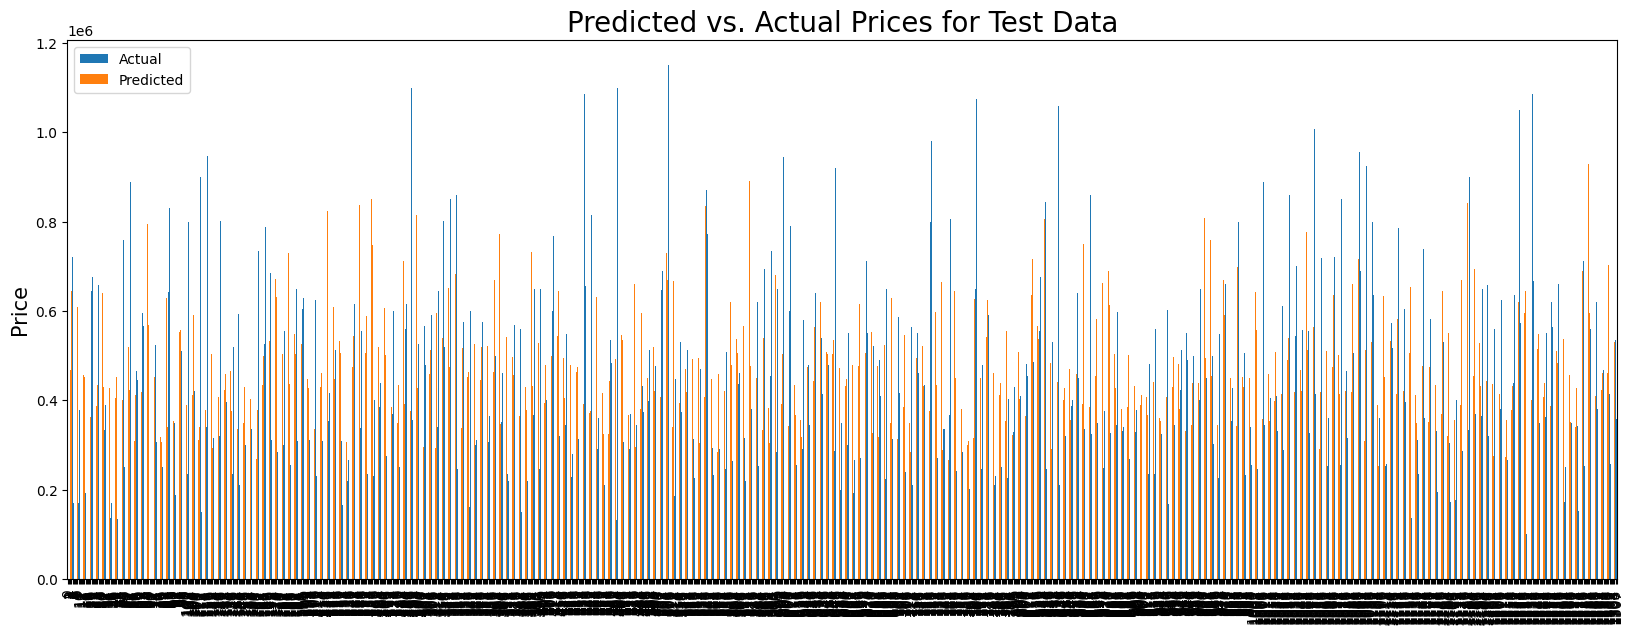

In [41]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

def compare_plot(df_comp):
    df_comp.reset_index(drop=True, inplace=True)
    df_comp.plot(y=['Actual', 'Predicted'], kind='bar', figsize=(20, 7))
    plt.title('Predicted vs. Actual Prices for Test Data', fontsize=20)
    plt.ylabel('Price', fontsize=15)
    plt.show()

compare_plot(df_comp)
